# <img src="cropped-SummerWorkshop_Header.png">  

<h1 align="center">Python Bootcamp and Summer Workshop on the Dynamic Brain</h1> 
<h3 align="center">August 19-September 3, 2017</h3> 

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>This notebook will introduce you to the Neuropixels dataset and SDK functions. 

<p>We want to look at correlations between spike trains in two visual areas.
</div>

In [1]:
# We need to import these modules to get started
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>The main entry point is the TBD. For this workshop, all of the data has been preloaded onto the hard drives you have received.

In [2]:
from ecephys_analysis_modules.common.sdk.EPhys_analysis_main_swdb import NaturalImages, DriftingGrating

In [6]:
#Set the path to the folder containing the NWB file

nwbfolder = '../mnt/allen/aibs/mat/RamIyer/SWDB_2018/Josh_data'
#nwbfolder = '/allen/aibs/mat/RamIyer/SWDB_2018/Sev_Data/test_M15'

#Specify regions from which we will be analyzing spike trains
regions_of_interest = ['V1']#,'LM']

In [7]:
#Obtain stimulus and response data for natural images and drifting gratings

ni = NaturalImages(exptpath=nwbfolder,region_list = regions_of_interest)
dg = DriftingGrating(exptpath=nwbfolder,region_list = regions_of_interest)

('NWB file:', 'mouse372584_probe_surf_bob.nwb')
Data folder already exists
probeA AM
probeB PM
probeC V1
probeD LM
probeE AL
probeF RL
['probeC'] ['V1']
dense_noise_8deg_2
drifting_gratings_4
gabor_20_deg_3
images_5
locally_sparse_noise_4deg_0
locally_sparse_noise_8deg_1
natural_movie_3_7
spontaneous
static_gratings_6
Calculating responses for each sweep
Calculating mean responses
('NWB file:', 'mouse372584_probe_surf_bob.nwb')
Data folder already exists
probeA AM
probeB PM
probeC V1
probeD LM
probeE AL
probeF RL
['probeC'] ['V1']
dense_noise_8deg_2
drifting_gratings_4
gabor_20_deg_3
images_5
locally_sparse_noise_4deg_0
locally_sparse_noise_8deg_1
natural_movie_3_7
spontaneous
static_gratings_6
Calculating responses for each sweep
Calculating drifting grating mean responses for each stimulus condition


In [8]:
#Choose two units randomly from amongst all units recorded in V1
from numpy.random import randint as ri

numcells_V1 = len(dg.unit_list['V1']) #number of recorded units in V1

#unit_nos = ri(numcells_V1,size=2) # random number to select a unit

#unit_nos = [10,30]
unit_nos = [10,45]

print unit_nos, unit_nos[0], unit_nos[1], dg.unit_list['V1'][unit_nos]

[10, 45] 10 45 ['313' '335']


In [9]:
#Get the corresponding unit IDs and spike times for these two cells
cell_id_0 = str(dg.unit_list['V1'][unit_nos[0]])
cell_id_1 = str(dg.unit_list['V1'][unit_nos[1]])
spt_0 = dg.spike_times['V1'][cell_id_0]
spt_1 = dg.spike_times['V1'][cell_id_1]

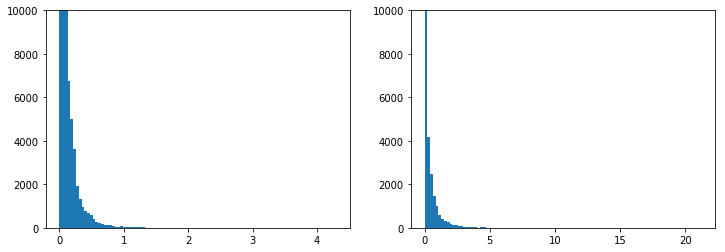

In [10]:
#Plot the ISI distributions for the two units we have isolated
fig,ax = plt.subplots(1,2,figsize = (12,4))
ax[0].hist(np.diff(spt_0),100)
ax[0].set_ylim([0,10000])
ax[1].hist(np.diff(spt_1),100)
ax[1].set_ylim([0,10000])
plt.show()

In [11]:
#Look at the waveform data for the two units

ind0 = np.where(dg.waveform_data['V1']['Unit_ID']==cell_id_0)[0]
ind1 = np.where(dg.waveform_data['V1']['Unit_ID']==cell_id_1)[0]
dg.waveform_data['V1'].head()#loc[unit_nos]

,Unit_ID,Type,Depth,waveform
0,213,rs,-3560,"[0.0, 6.26, 5.235, 3.0630000000000006, 4.20599..."
1,130,rs,-2440,"[0.0, -3.5529999999999995, -4.475, -1.584, -4...."
2,135,rs,-3440,"[0.0, 1.2600000000000002, -0.6219999999999999,..."
3,24,rs,-2920,"[0.0, 1.387, -2.9050000000000002, -1.357, 0.73..."
4,29,rs,-2800,"[0.0, -0.602, 1.0900000000000005, -2.495999999..."


In [12]:
# def convert_wvf_str_to_arr(x):
#     x1 = list(map(float, x.replace('[', '').replace(']', '').split()))
#     return x1

In [13]:
#dg.waveform_data['V1']['waveform'] =  dg.waveform_data['V1']['waveform'].apply(lambda x: convert_wvf_str_to_arr(x))

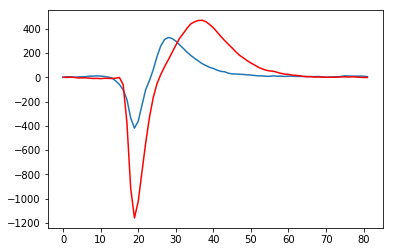

In [14]:
#Plot the waveform shapes for the two units

plt.figure()
plt.plot(dg.waveform_data['V1'].loc[unit_nos[0]]['waveform'])
plt.plot(dg.waveform_data['V1'].loc[unit_nos[1]]['waveform'],'r')
plt.show()

In [15]:
np.shape(dg.response['V1'])#, np.shape(dg.response['LM'])

(9, 6, 99, 2)

In [16]:
dg.orivals, dg.tfvals

(array([   0,   45,   90,  135,  180,  225,  270,  315, 1000]),
 array([   1,    2,    4,    8,   15, 1000]))

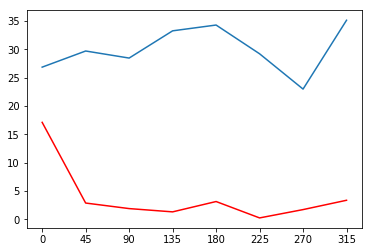

In [17]:
#Plot orientation tuning curves for the two units of interest  

ori = 0
ori_ind = np.where(dg.orivals == ori)[0][0]

tf = 1
tf_ind = np.where(dg.tfvals == tf)[0][0]

ori_tun_0 = dg.response['V1'][:-1,tf_ind,unit_nos[0],0]
ori_tun_1 = dg.response['V1'][:-1,tf_ind,unit_nos[1],0]

fig,ax = plt.subplots(1,1)
plt.plot(ori_tun_0)
plt.plot(ori_tun_1,'r')
ax.set_xticks(range(8))
ax.set_xticklabels(dg.orivals[:-1])
plt.show()

In [18]:
def raster(ax,event_times_list,color='k'):
    for ith, trial in enumerate(event_times_list):
        ax.vlines(trial,ith+.5,ith+1.5,color=color)

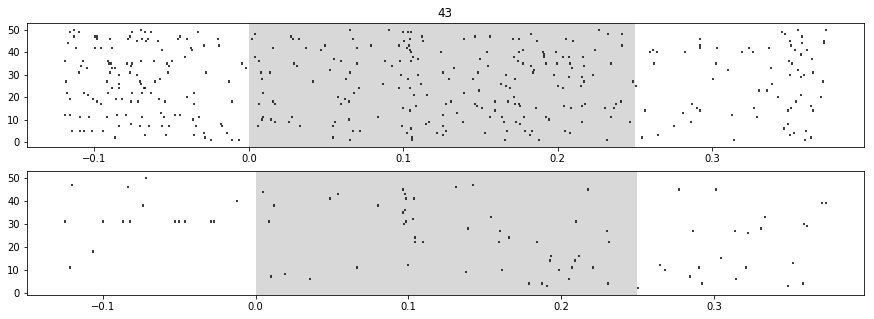

In [19]:
#Plot rasters for responses of the two chosen units to a specified image

img_num = ri(ni.number_images,size=1)[0] #98,65 seem nice examples
ni_spt_0 = ni.sweep_spiketimes_per_area['V1'][str(unit_nos[0])]
ni_spt_1 = ni.sweep_spiketimes_per_area['V1'][str(unit_nos[1])]

ni0_resp = ni_spt_0[np.where(ni.stim_table.Image==img_num)[0]]
ni1_resp = ni_spt_1[np.where(ni.stim_table.Image==img_num)[0]]

fig,ax = plt.subplots(2,1,figsize=(15,5))
raster(ax[0],ni0_resp,color='k')
ax[0].axvspan(0, ni.sweeplength ,ymin=0, ymax=1, facecolor='gray', alpha=0.3)
ax[0].set_title(img_num)
raster(ax[1],ni1_resp,color='k')
ax[1].axvspan(0, ni.sweeplength ,ymin=0, ymax=1, facecolor='gray', alpha=0.3)
plt.show()

In [20]:
def extract_local(train2,t1,binrange):
    """
    Returns events in `train2` which are within `binrange` of `t1`, aligned to `t1`

    Parameters
    ----------
    train2 : numpy array
    t1 : float
    binrange : tuple or list of length=2

    """

    start = np.searchsorted(train2,t1 + binrange[0])
    end = np.searchsorted(train2,t1 + binrange[1])

    return train2[start:end] - t1

def ccg(train1, train2, binrange, binsize):
    """
    Computes a cross-correlogram for two spike trains.

    Parameters
    ----------
    train1 : numpy array
        Primary spike train. Cross-correlogram will be computed relative to spikes in this spike train.
    train2 : numpy array
        Secondary spike train.
    binrange : tuple or list of length=2
        Window over which to compute cross correlogram.
    binsize : float
        Size of bins in cross-correlogram

    """
    
    nbins = int((binrange[1]-binrange[0])/binsize)
    
    diffs = [extract_local(train2,t1,binrange) for t1 in train1]
        
    diffs = np.hstack(diffs)
    diffs = diffs[diffs!=0]

    hist, edges = np.histogram(diffs, bins=nbins, range=binrange)
        
    return edges[1:]-binsize/2, hist /float(len(train1))*100

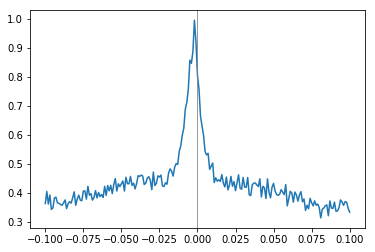

In [21]:
#Plot cross-correlogram between spike trains recorded from the two units

binsize = 0.001
ccg_win = [-0.1005,0.1005] #np.arange(-0.1005,0.1005,binsize)
ccg_centers,ccg_vals = ccg(spt_0,spt_1,ccg_win,binsize)
plt.figure()
plt.plot(ccg_centers,ccg_vals)
ax = plt.gca()
ax.axvline(ccg_centers[100],color='gray',linewidth = 0.8)
plt.show()